# Team 6 ML EDA Notebook


In [2]:
import pandas as pd
import numpy as np
import random
from  datetime import datetime
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import drive

drive.mount('/content/drive')


Mounted at /content/drive


In [4]:
n, sample_size = 40428967, 5000000
skip_values = sorted(random.sample(range(1, n), n - sample_size))


In [5]:
data = pd.read_csv('/content/drive/MyDrive/train_ctr.gz',skiprows=skip_values)
data.head()

,id,click,hour,C1,banner_pos,site_id,site_domain,site_category,app_id,app_domain,...,device_type,device_conn_type,C14,C15,C16,C17,C18,C19,C20,C21
0,10000949271186029916,1,14102100,1005,0,1fbe01fe,f3845767,28905ebd,ecad2386,7801e8d9,...,1,2,15707,320,50,1722,0,35,-1,79
1,10002518649031436658,0,14102100,1005,0,85f751fd,c4e18dd6,50e219e0,98fed791,d9b5648e,...,1,0,20984,320,50,2371,0,551,-1,46
2,10004670021948955159,0,14102100,1005,0,543a539e,c7ca3108,3e814130,ecad2386,7801e8d9,...,1,0,20366,320,50,2333,0,39,-1,157
3,10006192453619779489,0,14102100,1005,0,85f751fd,c4e18dd6,50e219e0,685d1c4c,2347f47a,...,1,3,15708,320,50,1722,0,35,-1,79
4,10006557235872316145,0,14102100,1005,0,1fbe01fe,f3845767,28905ebd,ecad2386,7801e8d9,...,1,0,15699,320,50,1722,0,35,-1,79


In [6]:
data.columns


Index(['id', 'click', 'hour', 'C1', 'banner_pos', 'site_id', 'site_domain',
       'site_category', 'app_id', 'app_domain', 'app_category', 'device_id',
       'device_ip', 'device_model', 'device_type', 'device_conn_type', 'C14',
       'C15', 'C16', 'C17', 'C18', 'C19', 'C20', 'C21'],
      dtype='object')

In [7]:
data['hour'] = pd.to_datetime(data['hour'], format='%y%m%d%H')
data.head()


,id,click,hour,C1,banner_pos,site_id,site_domain,site_category,app_id,app_domain,...,device_type,device_conn_type,C14,C15,C16,C17,C18,C19,C20,C21
0,10000949271186029916,1,2014-10-21,1005,0,1fbe01fe,f3845767,28905ebd,ecad2386,7801e8d9,...,1,2,15707,320,50,1722,0,35,-1,79
1,10002518649031436658,0,2014-10-21,1005,0,85f751fd,c4e18dd6,50e219e0,98fed791,d9b5648e,...,1,0,20984,320,50,2371,0,551,-1,46
2,10004670021948955159,0,2014-10-21,1005,0,543a539e,c7ca3108,3e814130,ecad2386,7801e8d9,...,1,0,20366,320,50,2333,0,39,-1,157
3,10006192453619779489,0,2014-10-21,1005,0,85f751fd,c4e18dd6,50e219e0,685d1c4c,2347f47a,...,1,3,15708,320,50,1722,0,35,-1,79
4,10006557235872316145,0,2014-10-21,1005,0,1fbe01fe,f3845767,28905ebd,ecad2386,7801e8d9,...,1,0,15699,320,50,1722,0,35,-1,79


In [8]:


data['click'].value_counts()/data.shape[0]

,count
click,
0,0.830173
1,0.169827


In [9]:
data.nunique()

,0
id,5000000
click,2
hour,240
C1,7
banner_pos,7
site_id,3555
site_domain,4562
site_category,24
app_id,5155
app_domain,324


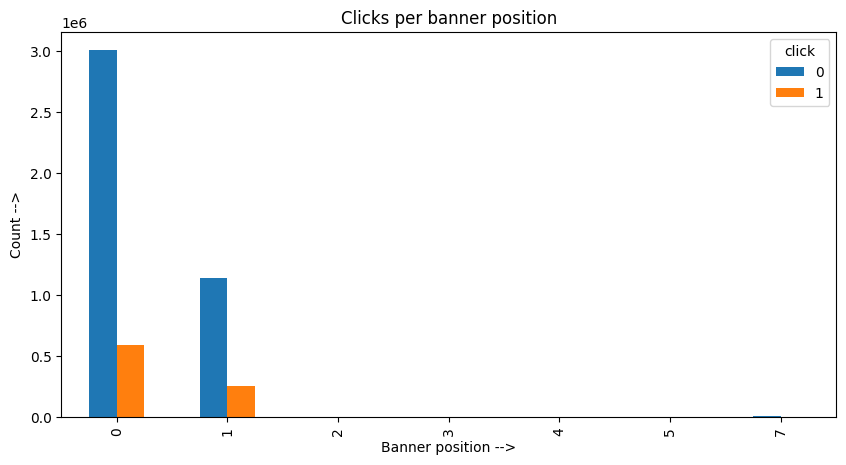

In [10]:
df_new = data.groupby(['banner_pos', 'click']).size().unstack()
df_new.plot(kind='bar', figsize=(10, 5), ylabel='Count -->', xlabel='Banner position -->',
            title='Clicks per banner position', legend=['Ad shown', 'Ad clicked'])
plt.show()


In [11]:
df_new['CTR'] = df_new[1]/(df_new[0]+df_new[1])
df_new

click,0,1,CTR
banner_pos,,,
0,3008449,591041,0.164201
1,1135727,255793,0.183823
2,1375,209,0.131944
3,200,42,0.173554
4,798,198,0.198795
5,612,96,0.135593
7,3703,1757,0.321795


<ipython-input-12-11445b901acb>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=df_new['CTR'], x=df_new.index, palette='flare')


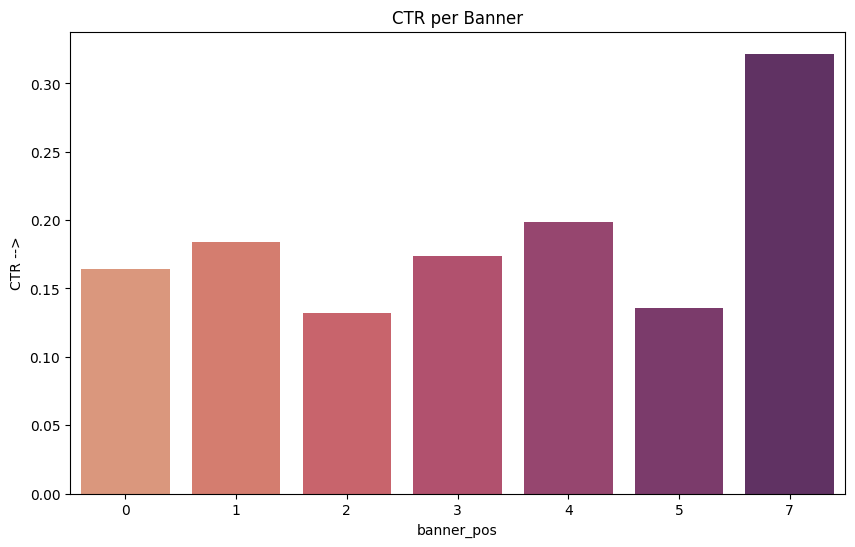

In [12]:
plt.figure(figsize=(10, 6))
sns.barplot(y=df_new['CTR'], x=df_new.index, palette='flare')
plt.ylabel('CTR -->')
plt.title('CTR per Banner')
plt.show()


<ipython-input-14-e2bb42839ac8>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=df_new['CTR'], x=df_new.index, palette='flare')


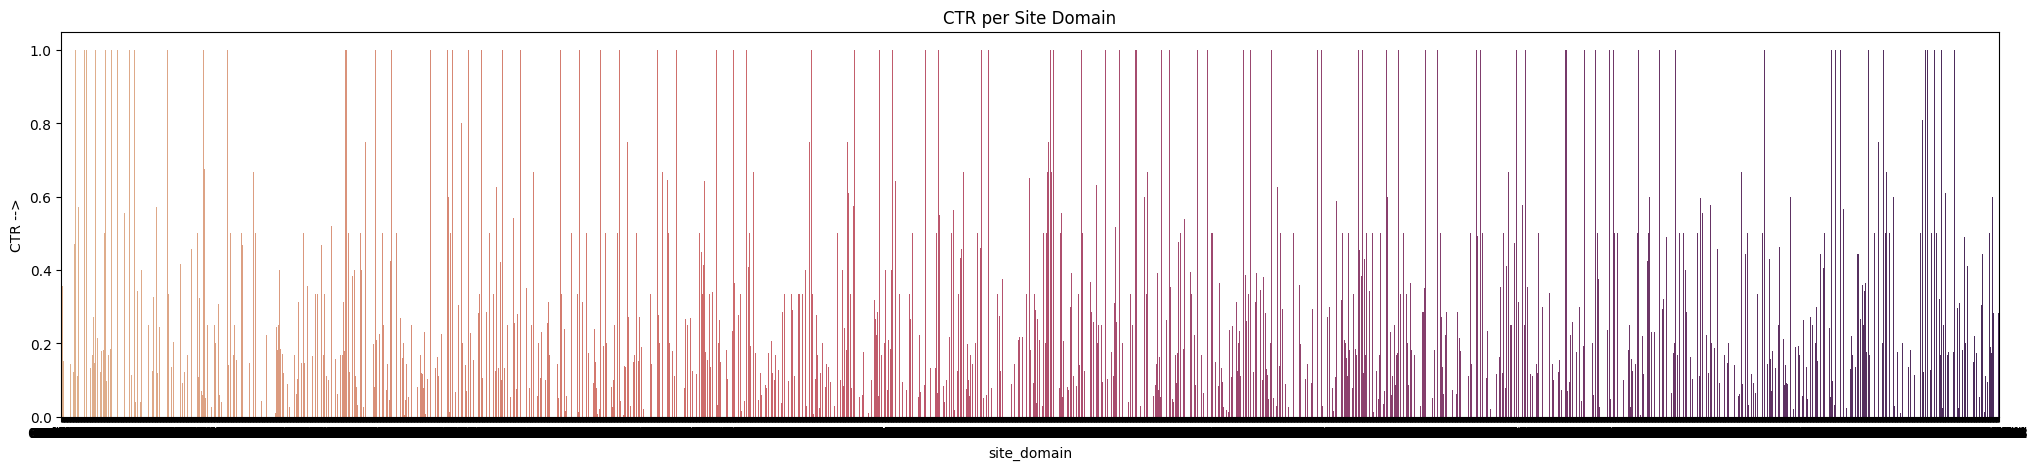

In [14]:
df_new = data.groupby(['site_domain', 'click']).size().unstack()
df_new['CTR'] = df_new[1] / df_new.sum(axis=1)

plt.figure(figsize=(25, 5))
sns.barplot(y=df_new['CTR'], x=df_new.index, palette='flare')
plt.ylabel('CTR -->')
plt.title('CTR per Site Domain')
plt.show()


In [15]:
print('The average CTR for site domains is : ',df_new['CTR'].mean())

The average CTR for site domains is :  0.32394717256036976


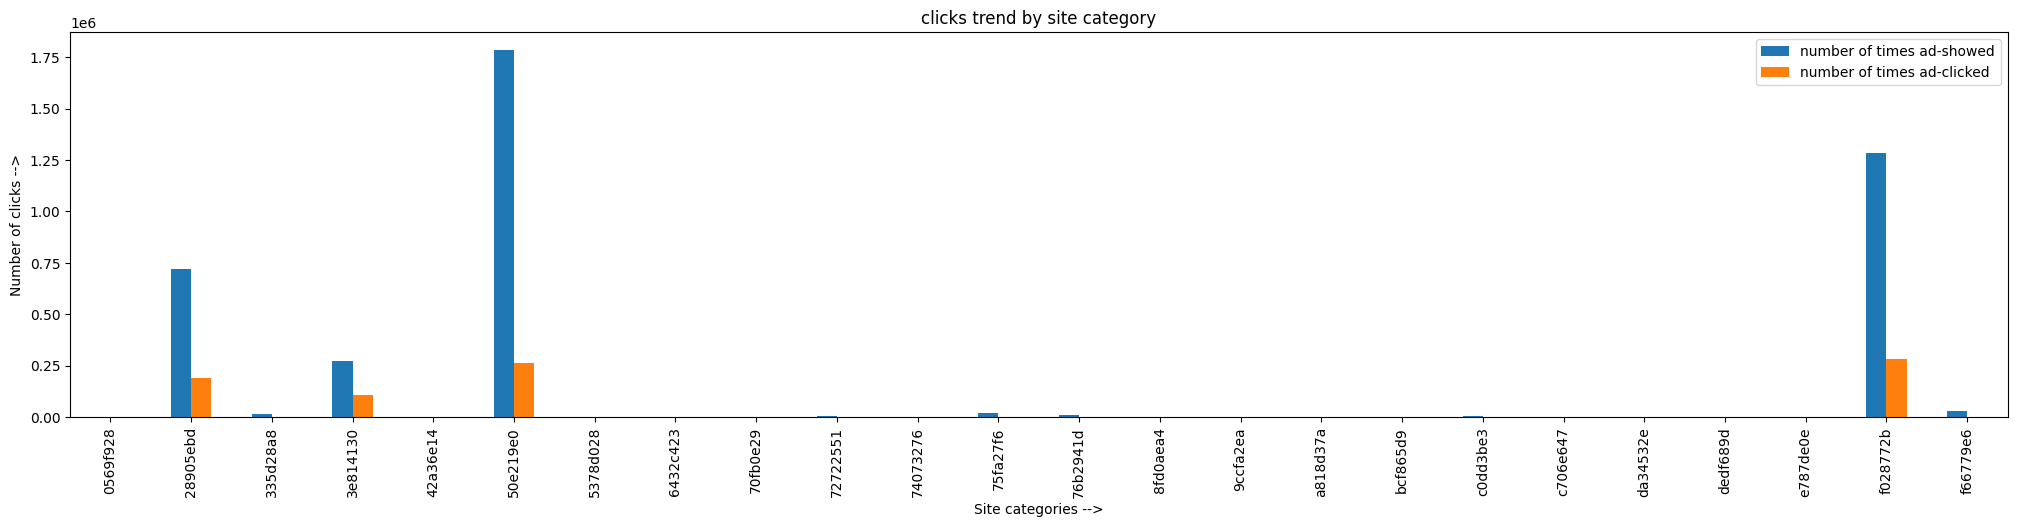

In [16]:
data.groupby(['site_category','click']).size().unstack().plot(kind='bar',figsize=(25,5))
plt.ylabel('Number of clicks -->')
plt.xlabel('Site categories -->')
plt.title('clicks trend by site category')
plt.legend(['number of times ad-showed','number of times ad-clicked'])
plt.show()

<ipython-input-17-ae8bf36ce26c>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=df_new['CTR'], x=df_new.index, palette='flare')


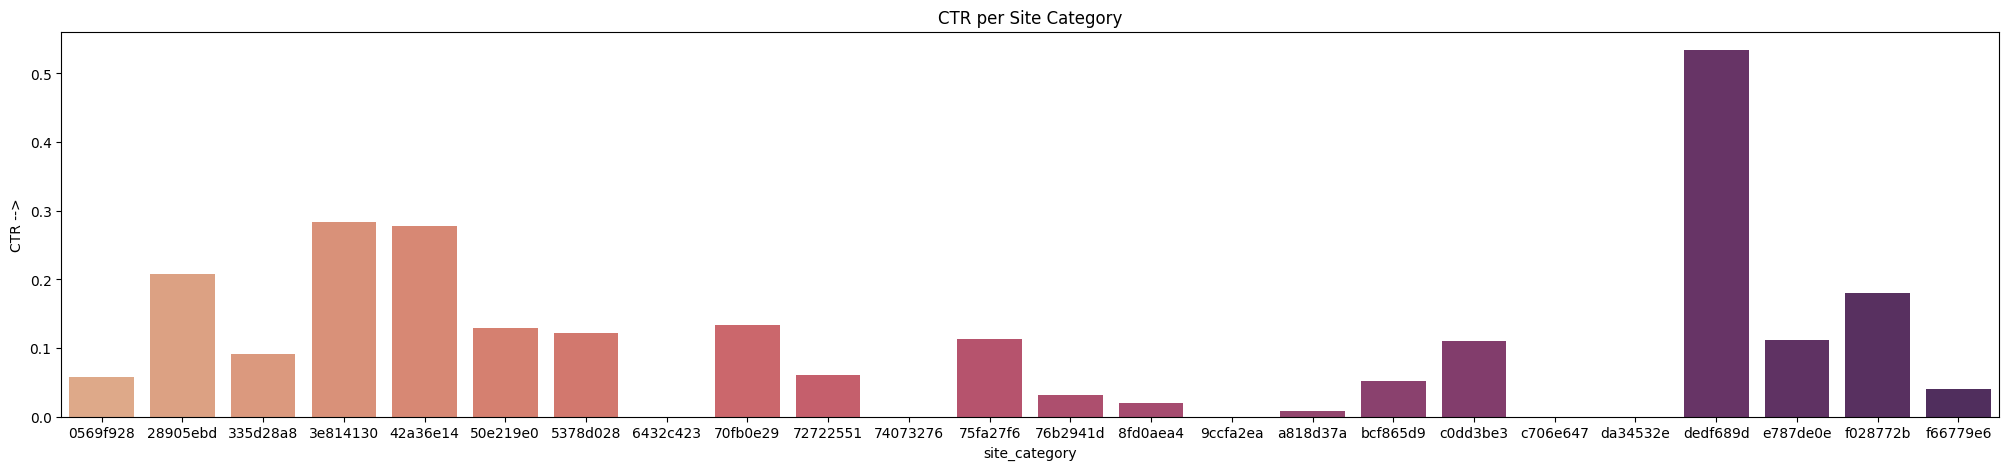

In [17]:
df_new = data.groupby(['site_category', 'click']).size().unstack()
df_new['CTR'] = df_new[1] / df_new.sum(axis=1)

plt.figure(figsize=(25, 5))
sns.barplot(y=df_new['CTR'], x=df_new.index, palette='flare')
plt.ylabel('CTR -->')
plt.title('CTR per Site Category')
plt.show()


In [18]:
print('The average CTR for site category is : ',df_new['CTR'].mean())

The average CTR for site category is :  0.13469972036165825


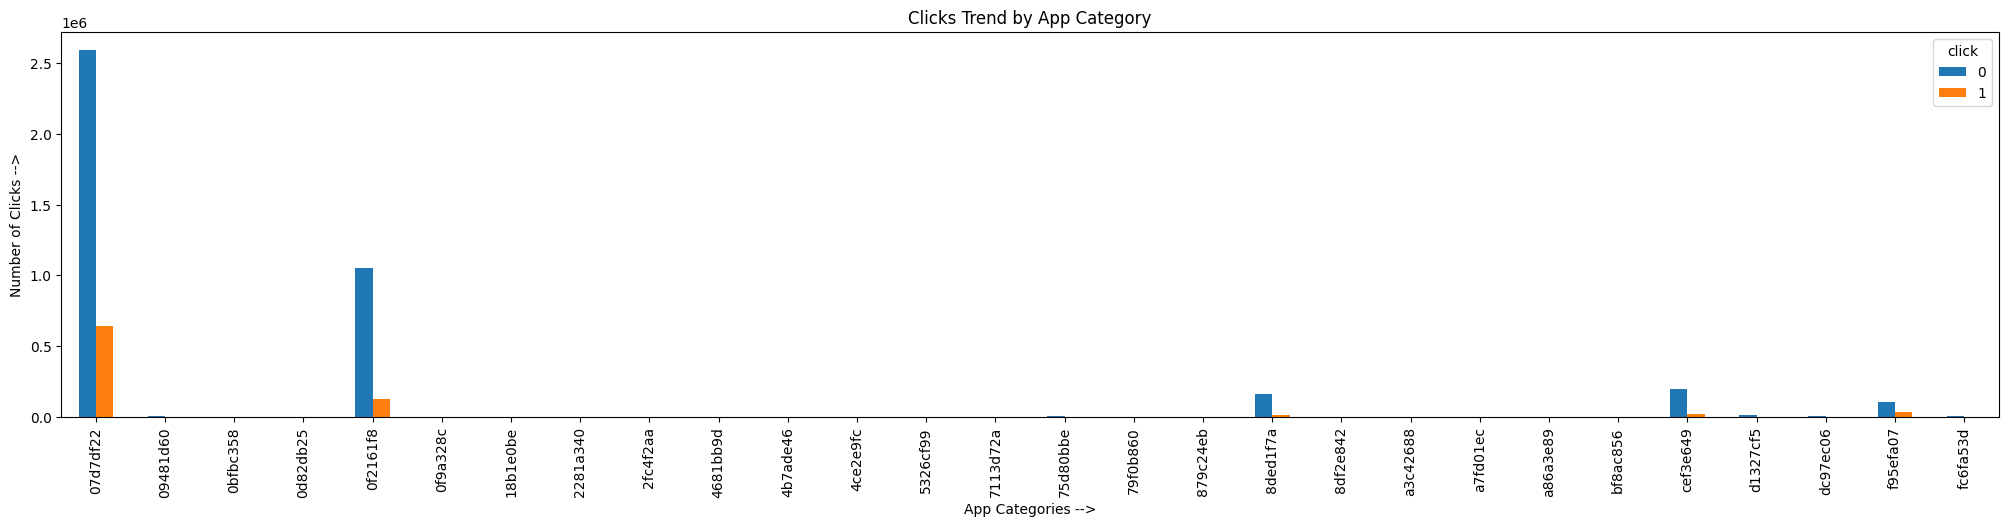

In [19]:
data.groupby(['app_category', 'click']).size().unstack().plot(
    kind='bar', figsize=(25, 5), ylabel='Number of Clicks -->', xlabel='App Categories -->',
    title='Clicks Trend by App Category', legend=['Ad Shown', 'Ad Clicked']
)
plt.show()


<ipython-input-20-0421f1de1dfe>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=df_new['CTR'], x=df_new.index, palette='flare')


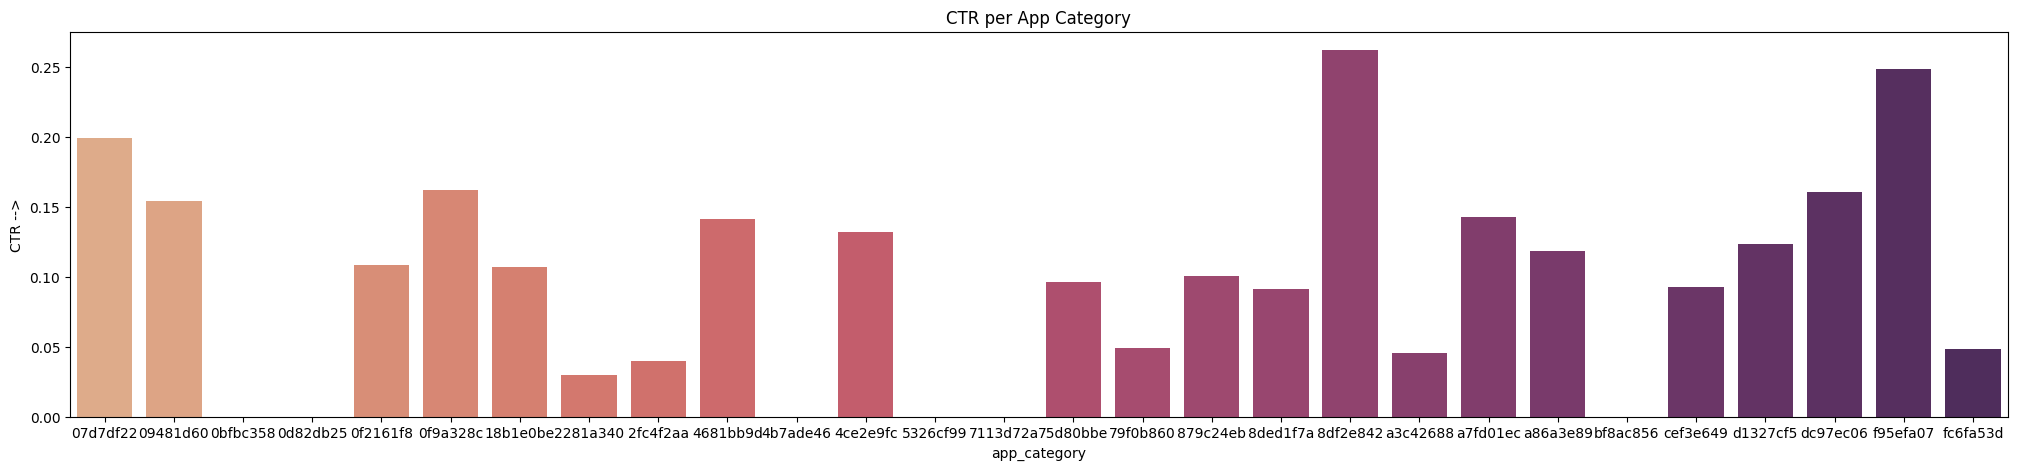

In [20]:
df_new = data.groupby(['app_category', 'click']).size().unstack()
df_new['CTR'] = df_new[1] / df_new.sum(axis=1)

plt.figure(figsize=(25, 5))
sns.barplot(y=df_new['CTR'], x=df_new.index, palette='flare')
plt.ylabel('CTR -->')
plt.title('CTR per App Category')
plt.show()


In [21]:
print('The average CTR for app category is : ',df_new['CTR'].mean())

The average CTR for app category is :  0.12054925955884871


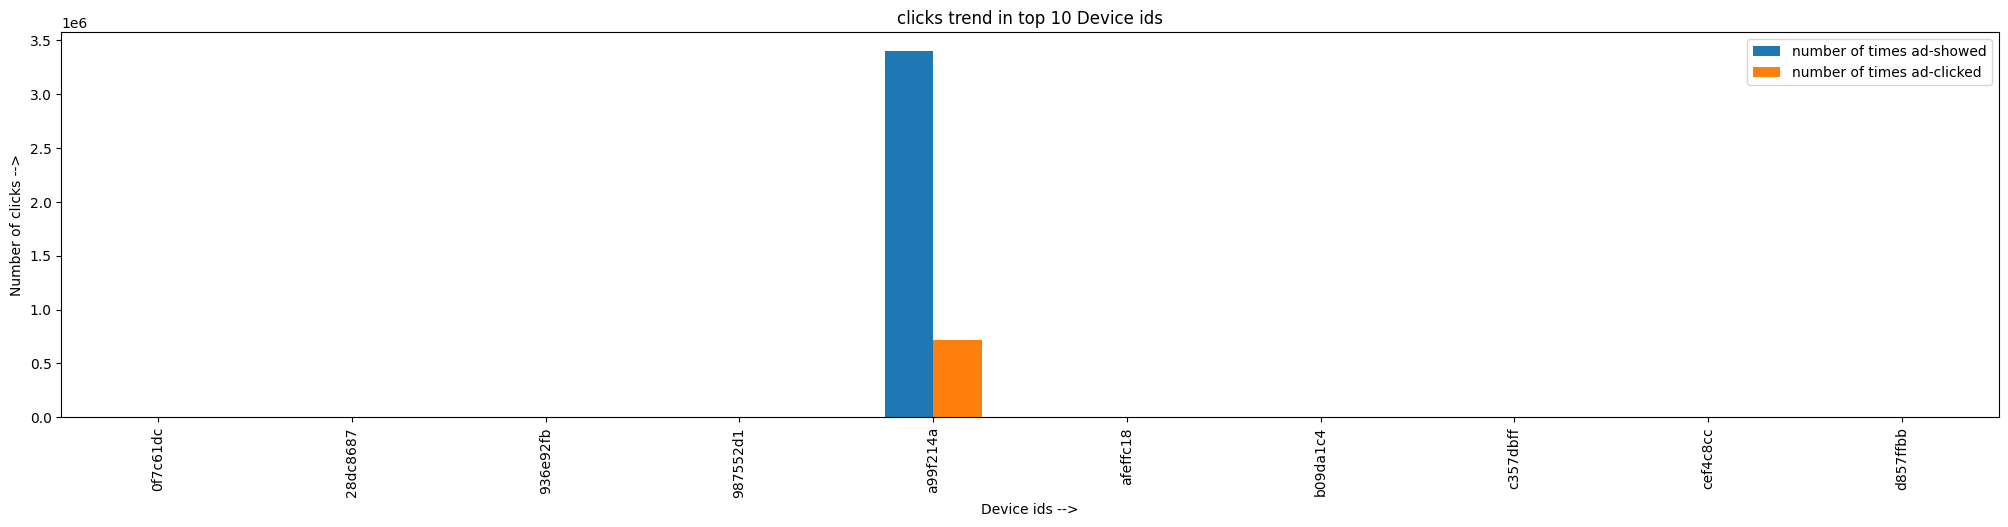

In [22]:
top10_device = data[(data['device_id'].isin((data['device_id'].value_counts()/data.shape[0])[0:10].index))]
top10_device.groupby(['device_id','click']).size().unstack().plot(kind='bar',figsize=(25,5))
plt.ylabel('Number of clicks -->')
plt.xlabel('Device ids -->')
plt.title('clicks trend in top 10 Device ids')
plt.legend(['number of times ad-showed','number of times ad-clicked'])
plt.show()

<ipython-input-23-b94cfeeb6d83>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=df_new['CTR'].values,x=df_new.index,palette='flare')


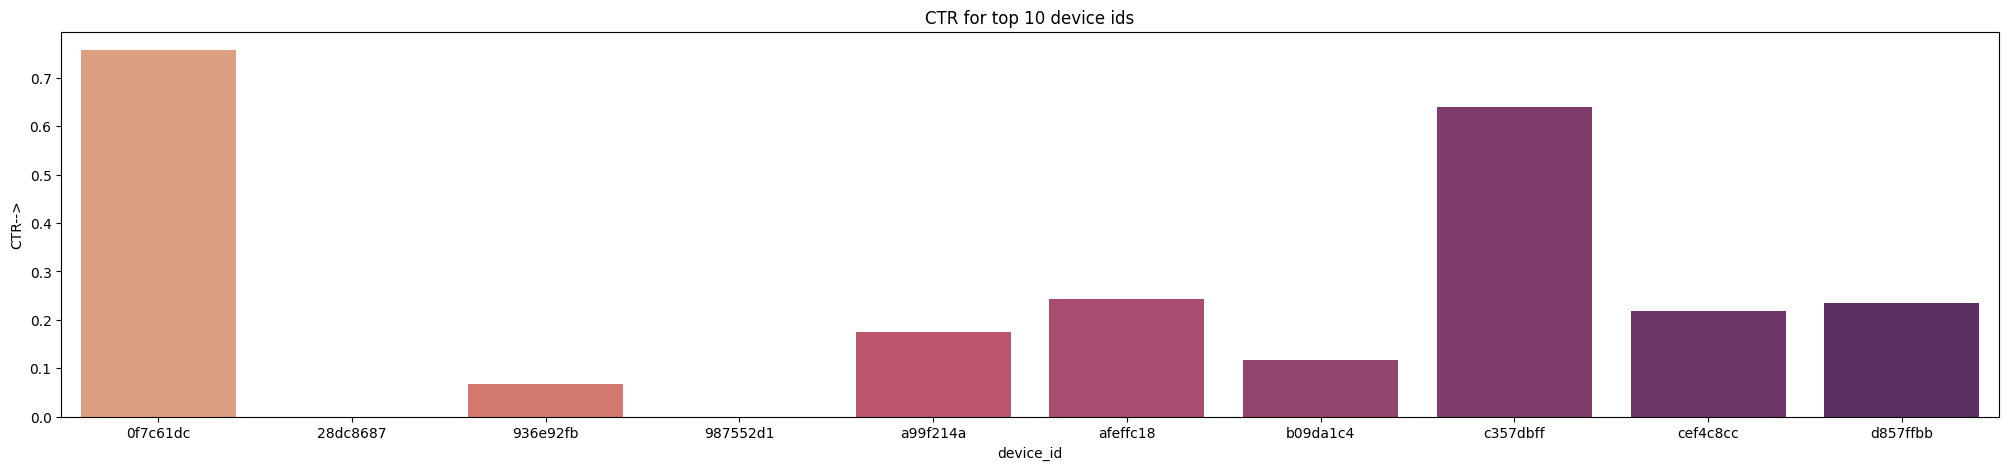

In [ ]:
df_new=top10_device.groupby(['device_id','click']).size().unstack()
df_new['CTR']= df_new[1]/(df_new[0]+df_new[1])
plt.figure(figsize=(25,5))
sns.barplot(y=df_new['CTR'].values,x=df_new.index,palette='flare')
plt.ylabel('CTR-->')
plt.title('CTR for top 10 device ids')
plt.show()

In [ ]:
data_group=data[['device_id','id']].groupby(['device_id']).count()

In [ ]:
from tqdm import tqdm
id_count_feature=[]
for index in tqdm(data['device_id']):
    id_count_feature.append(data_group['id'][index])

100%|██████████| 5000000/5000000 [00:41<00:00, 120779.95it/s]


In [ ]:
data['device_id_counts']=id_count_feature

In [28]:
df_new

click,0,1,CTR
device_id_counts,,,
1,398048.0,82907.0,0.172380
2,121729.0,19199.0,0.136233
3,58979.0,7936.0,0.118598
4,35256.0,4388.0,0.110685
5,22968.0,2702.0,0.105259
...,...,...,...
1201,908.0,293.0,0.243963
1727,1609.0,118.0,0.068327
2440,881.0,1559.0,0.638934


<ipython-input-29-4cd65f33ec7d>:4: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(y=df_new['CTR'].values[:-1], x=df_new.index[:-1], palette='flare')


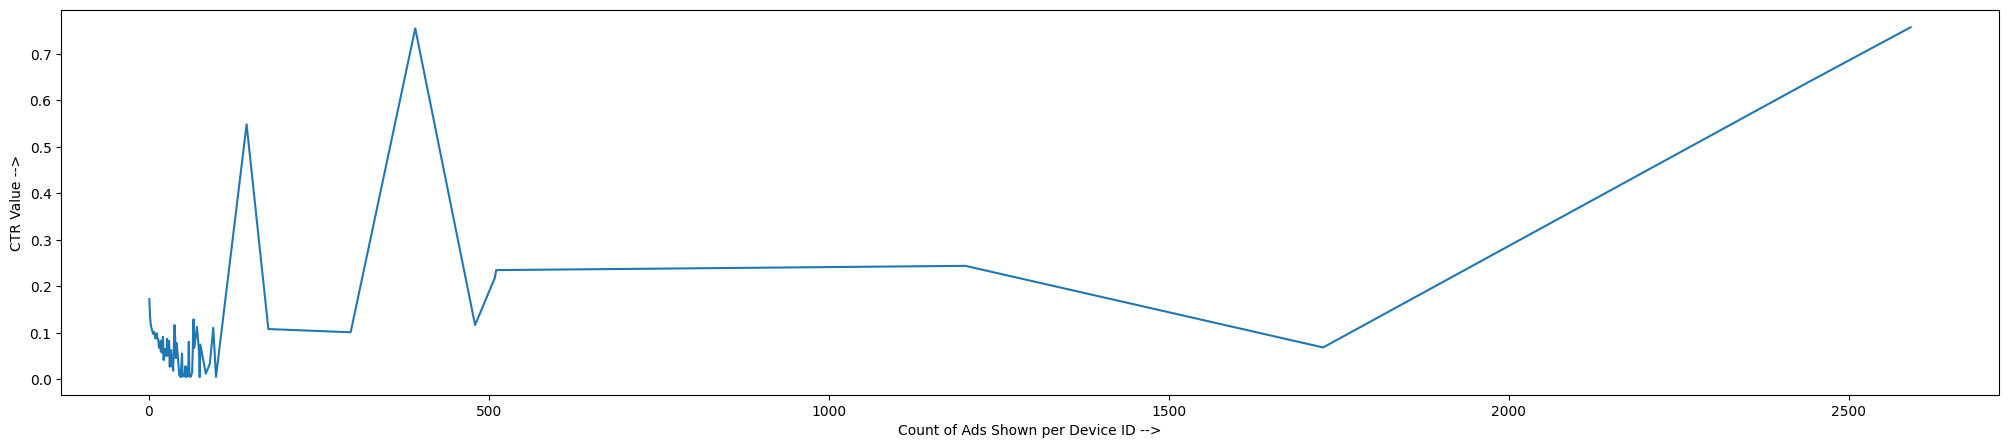

In [29]:
df_new.dropna(inplace=True)

plt.figure(figsize=(25, 5))
sns.lineplot(y=df_new['CTR'].values[:-1], x=df_new.index[:-1], palette='flare')
plt.xlabel('Count of Ads Shown per Device ID -->')
plt.ylabel('CTR Value -->')
plt.show()


In [30]:
data_group=data[['device_ip','id']].groupby(['device_ip']).count()

In [31]:
data_group.head()

,id
device_ip,
000009d4,1
00000a61,1
00000c31,1
00001180,1
00001b40,3


In [32]:
from tqdm import tqdm
ip_count_feature=[]
for index in tqdm(data['device_ip']):
    ip_count_feature.append(data_group['id'][index])

100%|██████████| 5000000/5000000 [00:57<00:00, 87212.43it/s]


In [33]:
data['device_ip_counts']=ip_count_feature

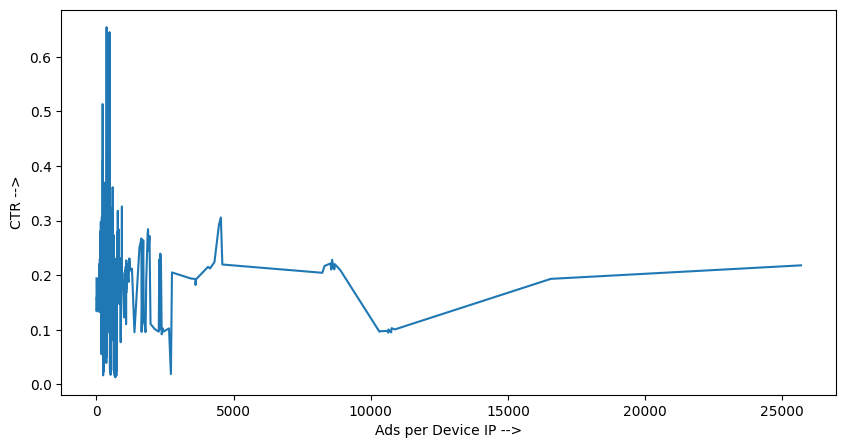

In [35]:
df_new = data.groupby(['device_ip_counts', 'click']).size().unstack()
df_new['CTR'] = df_new[1] / df_new.sum(axis=1)

plt.figure(figsize=(10, 5))
plt.plot(df_new['CTR'])
plt.xlabel('Ads per Device IP -->')
plt.ylabel('CTR -->')
plt.show()


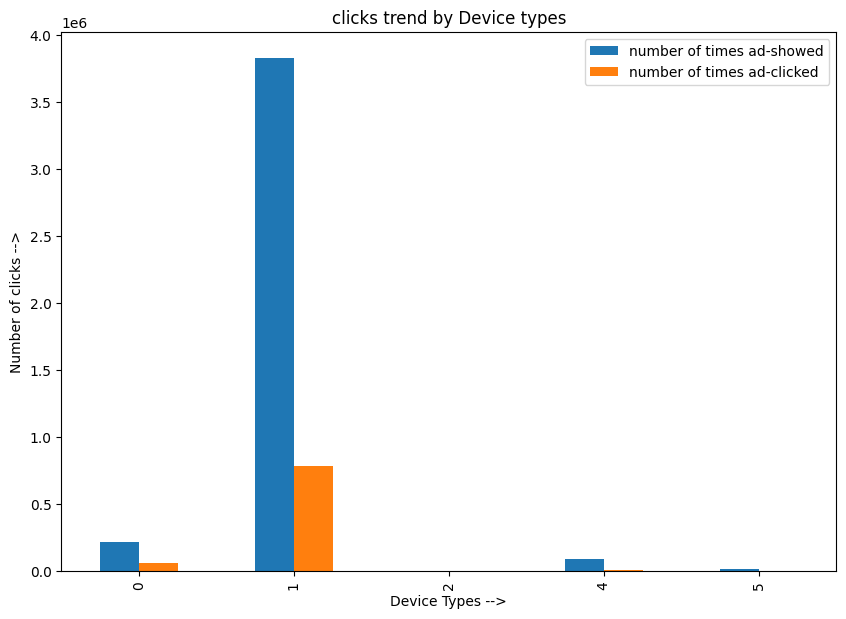

In [37]:
data.groupby(['device_type','click']).size().unstack().plot(kind='bar',figsize=(10,7))
plt.ylabel('Number of clicks -->')
plt.xlabel('Device Types -->')
plt.title('clicks trend by Device types')
plt.legend(['number of times ad-showed','number of times ad-clicked'])
plt.show()

<ipython-input-38-334d314ba260>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=df_new['CTR'], x=df_new.index, palette='flare')


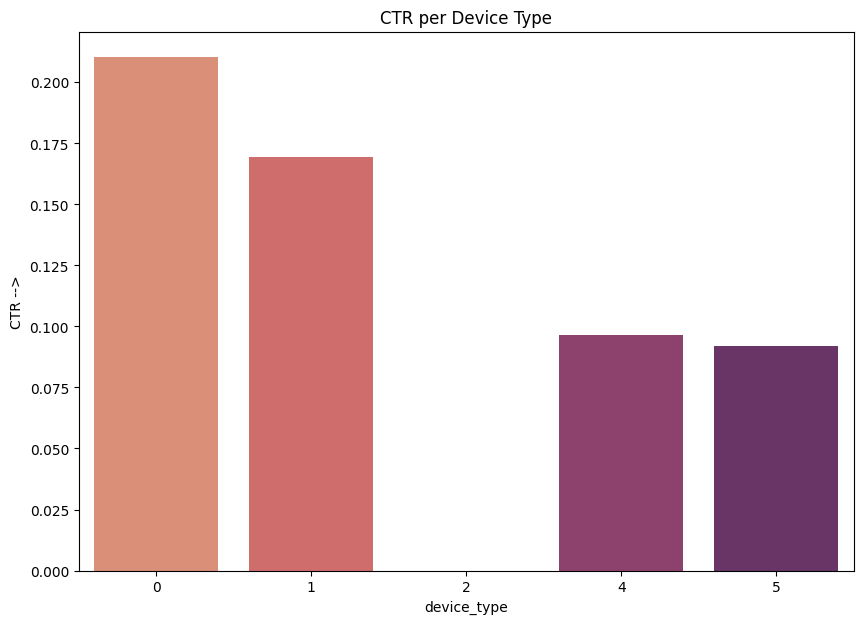

In [38]:
df_new = data.groupby(['device_type', 'click']).size().unstack()
df_new['CTR'] = df_new[1] / df_new.sum(axis=1)

plt.figure(figsize=(10, 7))
sns.barplot(y=df_new['CTR'], x=df_new.index, palette='flare')
plt.ylabel('CTR -->')
plt.title('CTR per Device Type')
plt.show()


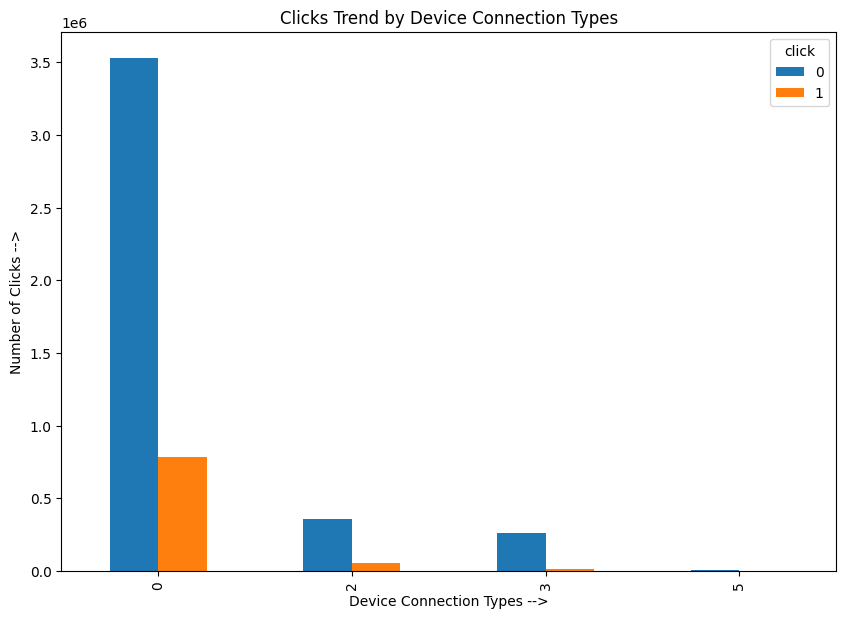

In [39]:
data.groupby(['device_conn_type', 'click']).size().unstack().plot(
    kind='bar', figsize=(10, 7), ylabel='Number of Clicks -->', xlabel='Device Connection Types -->',
    title='Clicks Trend by Device Connection Types', legend=['Ad Shown', 'Ad Clicked']
)
plt.show()


<ipython-input-40-3de98c8d4194>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=df_new['CTR'], x=df_new.index, palette='flare')


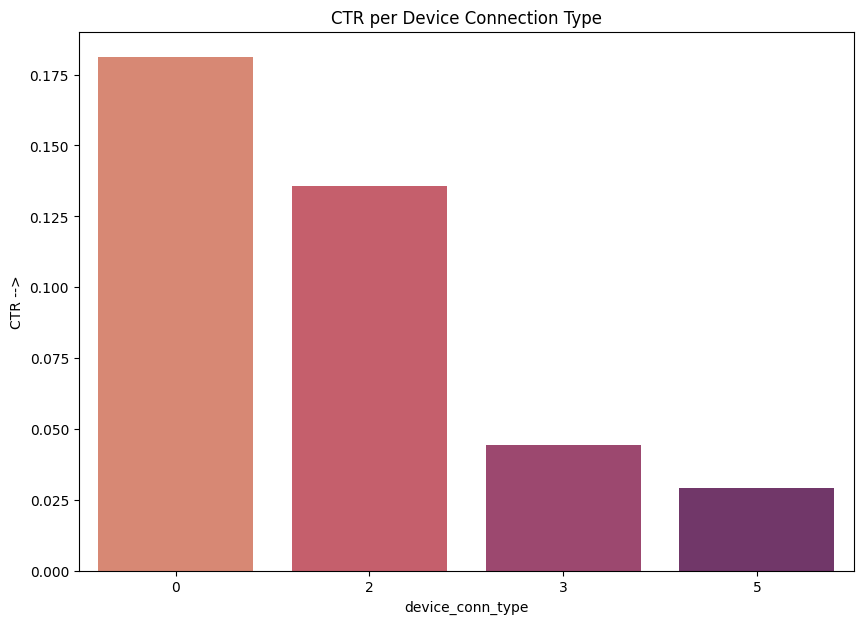

In [40]:
df_new = data.groupby(['device_conn_type', 'click']).size().unstack()
df_new['CTR'] = df_new[1] / df_new.sum(axis=1)

plt.figure(figsize=(10, 7))
sns.barplot(y=df_new['CTR'], x=df_new.index, palette='flare')
plt.ylabel('CTR -->')
plt.title('CTR per Device Connection Type')
plt.show()


<b> C1 </b>

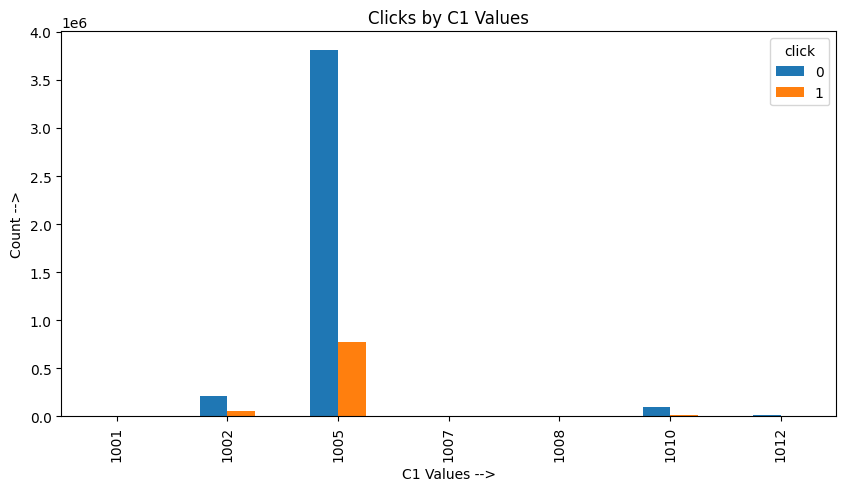

In [41]:
data.groupby(['C1', 'click']).size().unstack().plot(
    kind='bar', figsize=(10, 5), ylabel='Count -->', xlabel='C1 Values -->',
    title='Clicks by C1 Values', legend=['Ads Shown', 'Ads Clicked']
)
plt.show()


<ipython-input-42-ae39e049eb66>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=df_new['CTR'], x=df_new.index, palette='flare')


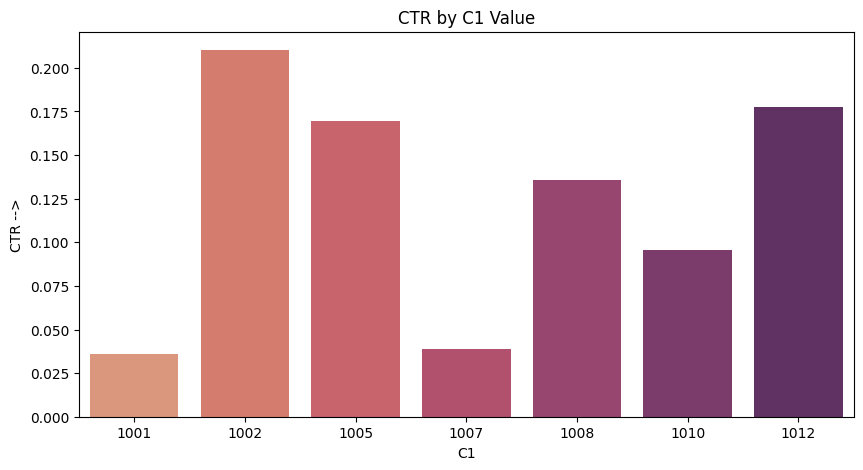

In [42]:
df_new = data.groupby(['C1', 'click']).size().unstack()
df_new['CTR'] = df_new[1] / df_new.sum(axis=1)

plt.figure(figsize=(10, 5))
sns.barplot(y=df_new['CTR'], x=df_new.index, palette='flare')
plt.ylabel('CTR -->')
plt.title('CTR by C1 Value')
plt.show()


<b> C14 </b>

<Figure size 2500x500 with 0 Axes>

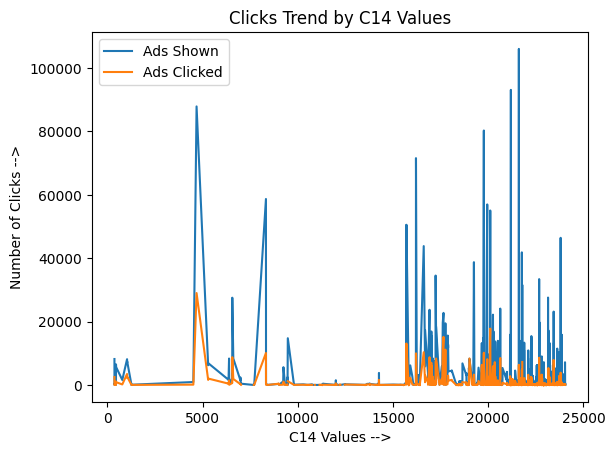

In [43]:
plt.figure(figsize=(25, 5))
data.groupby(['C14', 'click']).size().unstack().plot()
plt.ylabel('Number of Clicks -->')
plt.xlabel('C14 Values -->')
plt.title('Clicks Trend by C14 Values')
plt.legend(['Ads Shown', 'Ads Clicked'])
plt.show()


<b> C15 </b>

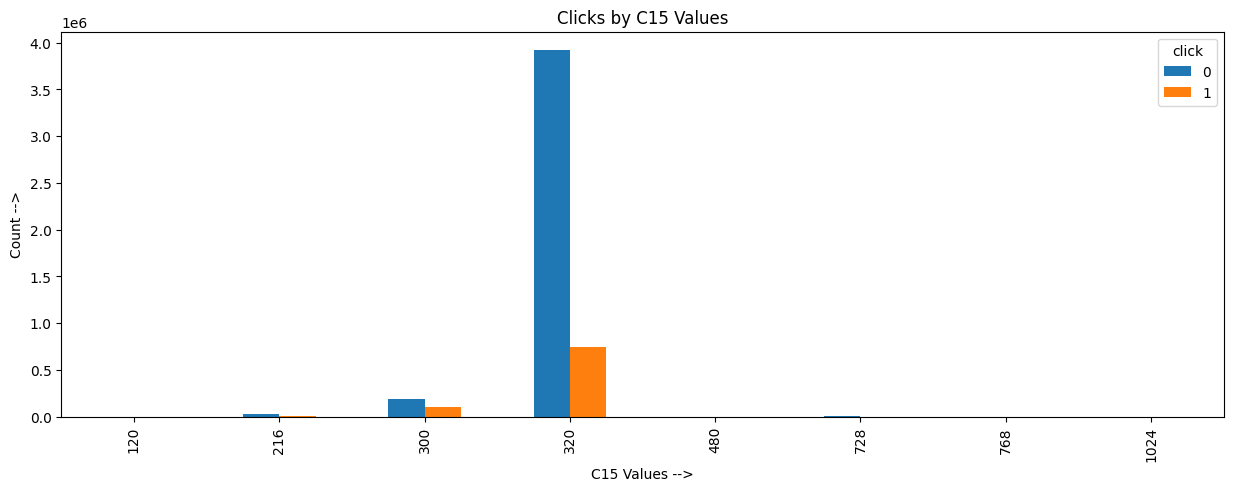

In [44]:
data.groupby(['C15', 'click']).size().unstack().plot(
    kind='bar', figsize=(15, 5), ylabel='Count -->', xlabel='C15 Values -->',
    title='Clicks by C15 Values', legend=['Ads Shown', 'Ads Clicked']
)
plt.show()


<ipython-input-45-bae45aa6e2a6>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=df_new['CTR'], x=df_new.index, palette='flare')


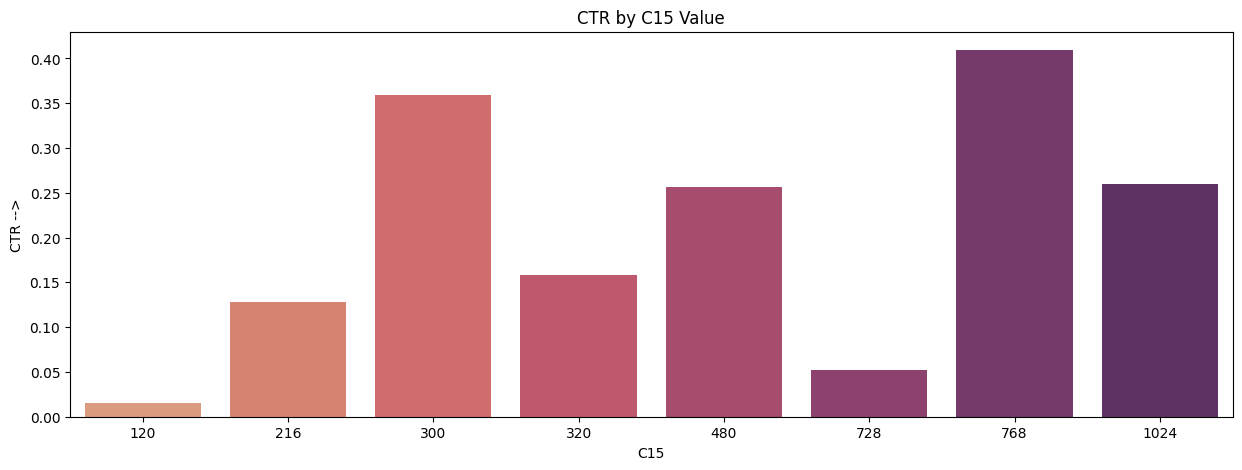

In [45]:
df_new = data.groupby(['C15', 'click']).size().unstack()
df_new['CTR'] = df_new[1] / df_new.sum(axis=1)

plt.figure(figsize=(15, 5))
sns.barplot(y=df_new['CTR'], x=df_new.index, palette='flare')
plt.ylabel('CTR -->')
plt.title('CTR by C15 Value')
plt.show()


<b>C16</b>

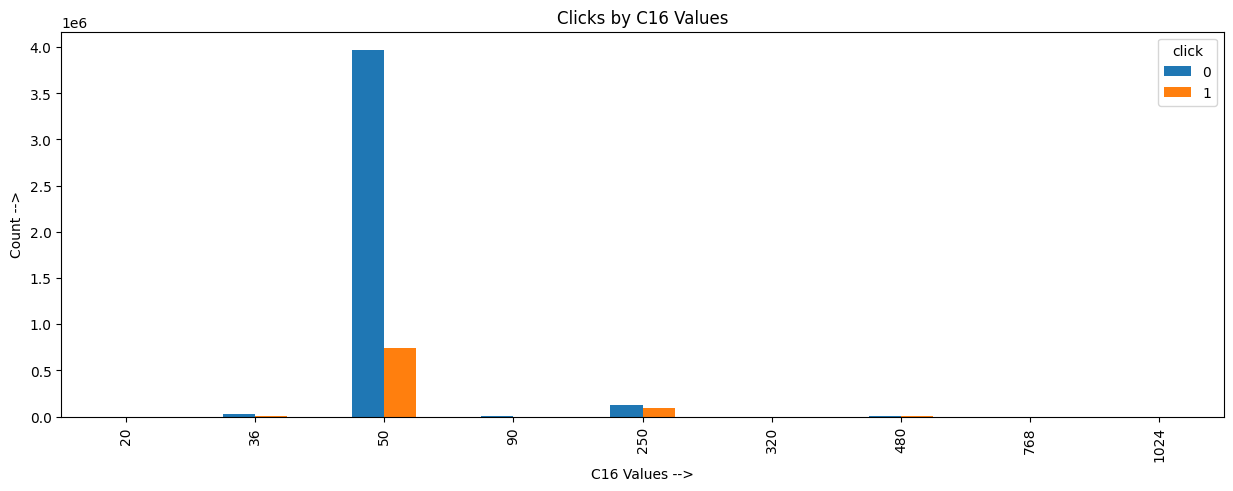

In [46]:
data.groupby(['C16', 'click']).size().unstack().plot(
    kind='bar', figsize=(15, 5), ylabel='Count -->', xlabel='C16 Values -->',
    title='Clicks by C16 Values', legend=['Ads Shown', 'Ads Clicked']
)
plt.show()


<ipython-input-47-97073c04697c>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=df_new['CTR'], x=df_new.index, palette='flare')


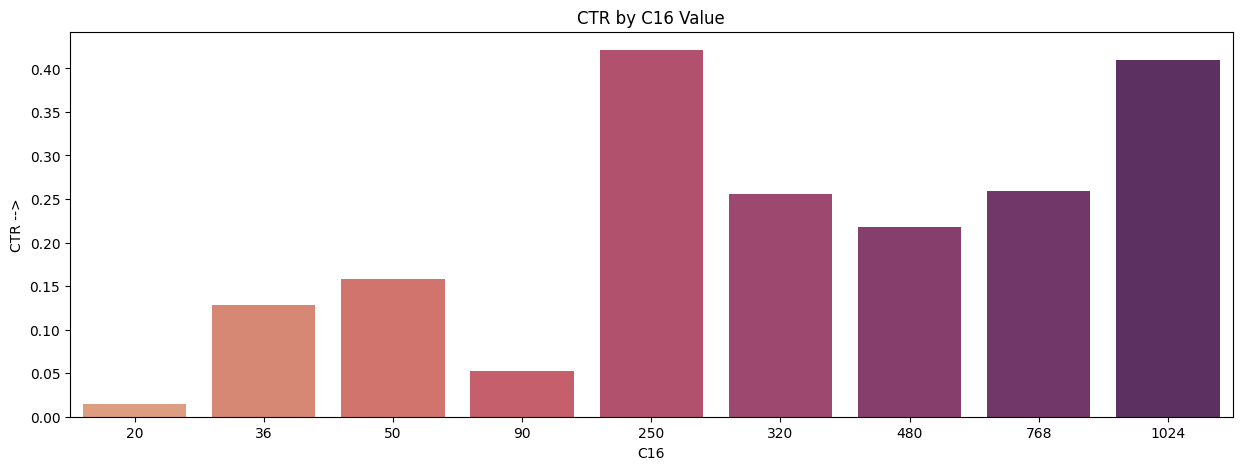

In [47]:
df_new = data.groupby(['C16', 'click']).size().unstack()
df_new['CTR'] = df_new[1] / df_new.sum(axis=1)

plt.figure(figsize=(15, 5))
sns.barplot(y=df_new['CTR'], x=df_new.index, palette='flare')
plt.ylabel('CTR -->')
plt.title('CTR by C16 Value')
plt.show()


<b> C17 </b>

In [ ]:
data['hour_numeric'] = data['hour'].astype('int64')
data['hour_numeric'].describe()


,hour_numeric
count,5.000000e+06
mean,1.414277e+18
std,2.580052e+14
min,1.413850e+18
25%,1.414037e+18
50%,1.414289e+18
75%,1.414505e+18
max,1.414710e+18


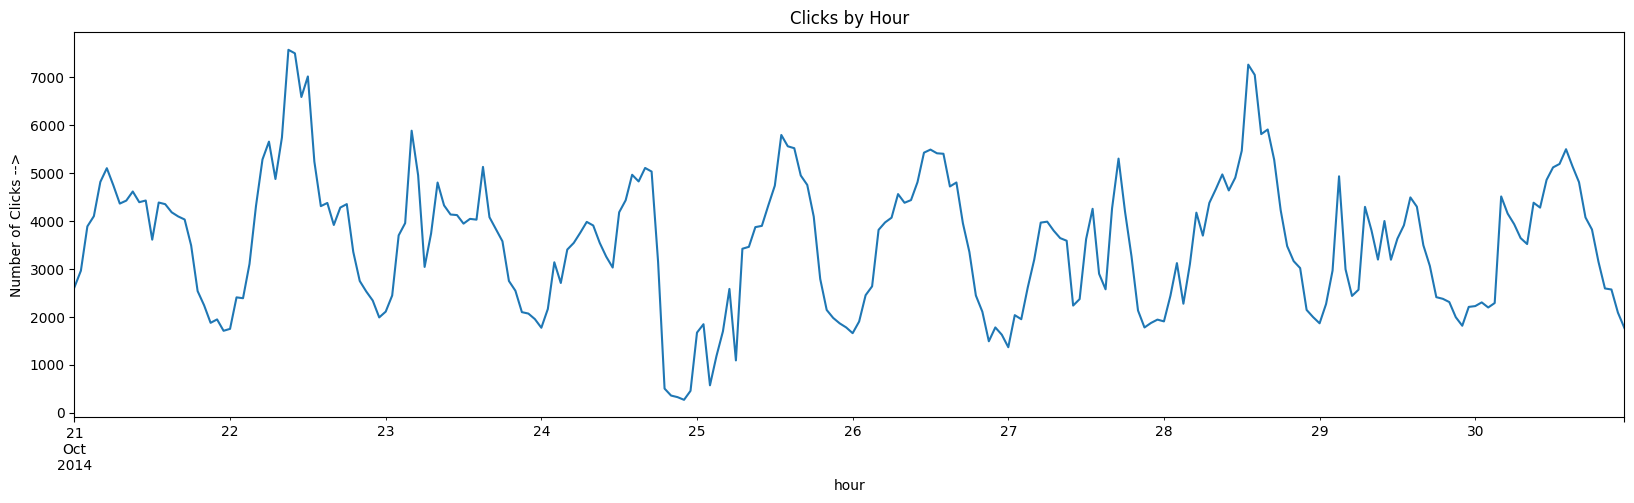

In [50]:
plt.figure(figsize=(20, 5))
data.groupby('hour')['click'].sum().plot()
plt.ylabel('Number of Clicks -->')
plt.title('Clicks by Hour')
plt.show()


<Figure size 1000x1000 with 0 Axes>

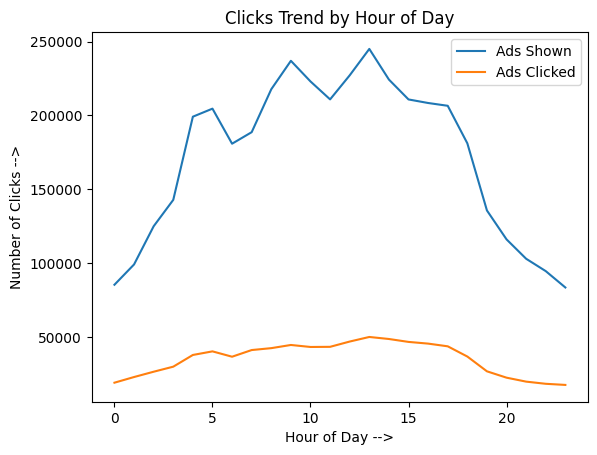

In [51]:
data['hour_of_day'] = data['hour'].dt.hour
plt.figure(figsize=(10, 10))
data.groupby(['hour_of_day', 'click']).size().unstack().plot()
plt.ylabel('Number of Clicks -->')
plt.xlabel('Hour of Day -->')
plt.title('Clicks Trend by Hour of Day')
plt.legend(['Ads Shown', 'Ads Clicked'])
plt.show()


<ipython-input-52-a07321e0899b>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=df_new['CTR'], x=df_new.index, palette='flare')


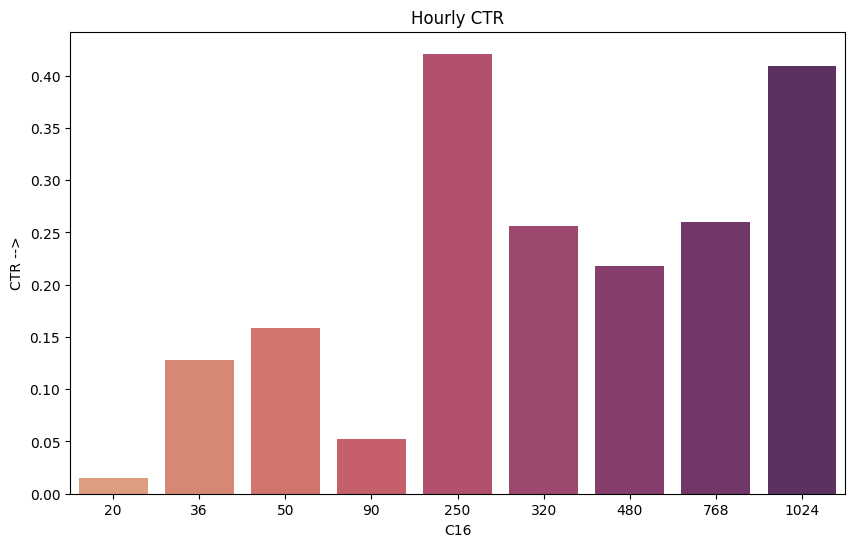

In [52]:
plt.figure(figsize=(10, 6))
sns.barplot(y=df_new['CTR'], x=df_new.index, palette='flare')
plt.ylabel('CTR -->')
plt.title('Hourly CTR')
plt.show()


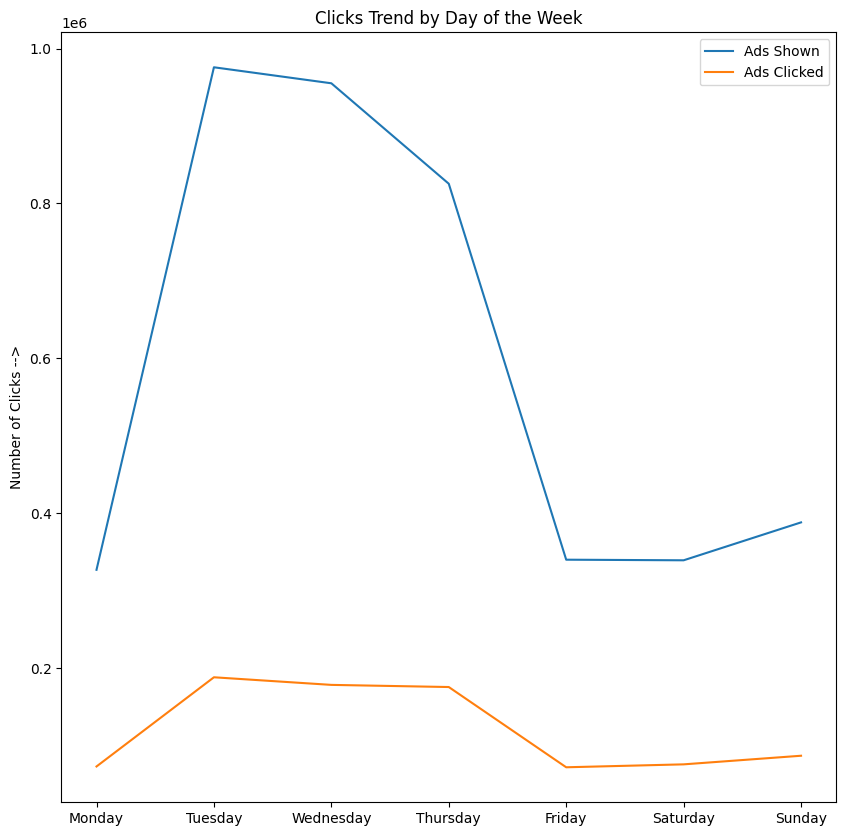

In [53]:
data['day_of_week'] = data['hour'].dt.day_name()
order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
df_new = data.groupby(['day_of_week', 'click']).size().unstack().reindex(order)

plt.figure(figsize=(10, 10))
plt.plot(df_new)
plt.ylabel('Number of Clicks -->')
plt.title('Clicks Trend by Day of the Week')
plt.legend(['Ads Shown', 'Ads Clicked'])
plt.show()


In [55]:
df_new['CTR']= df_new[1]/(df_new[0]+df_new[1])
df_new.head()

click,0,1,CTR
day_of_week,,,
Monday,326907,72920,0.182379
Tuesday,975912,188105,0.161600
Wednesday,955237,178286,0.157285
Thursday,825497,175515,0.175338
Friday,339966,71878,0.174527


<ipython-input-56-c0ebce7d0fd2>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=df_new['CTR'], x=df_new.index, palette='flare')


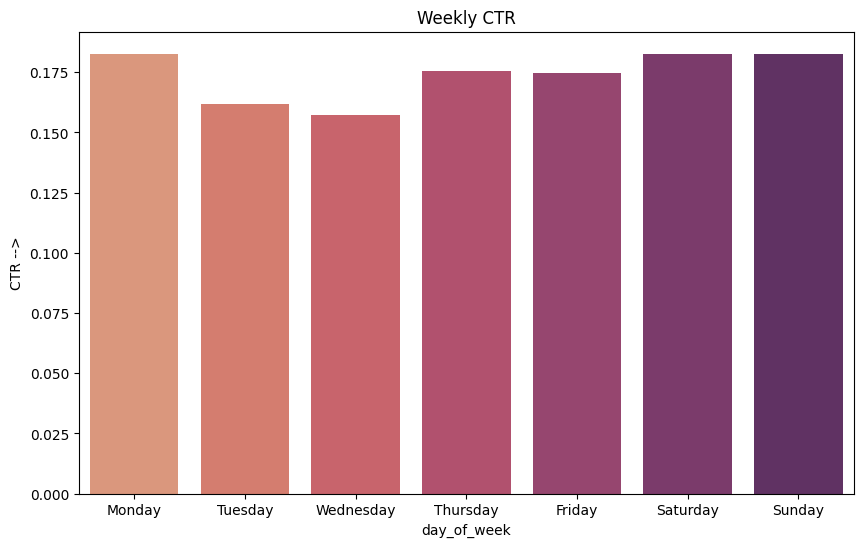

In [56]:
plt.figure(figsize=(10, 6))
sns.barplot(y=df_new['CTR'], x=df_new.index, palette='flare')
plt.ylabel('CTR -->')
plt.title('Weekly CTR')
plt.show()


Create a new feature, hourly user count, to visualize user frequency by hour and assess its predictive value.

In [57]:
data_group=data[['hour_of_day','device_ip']].groupby(['hour_of_day']).count()

In [58]:
data_group

,device_ip
hour_of_day,
0,104303
1,121892
2,151366
3,172663
4,236942
5,244832
6,217457
7,229785
8,260173


In [59]:
from tqdm import tqdm
user_count_feature=[]
for index in tqdm(data['hour_of_day']):
    user_count_feature.append(data_group['device_ip'][index])

100%|██████████| 5000000/5000000 [00:36<00:00, 137510.13it/s]


In [60]:
data['hourly_user_count']=user_count_feature

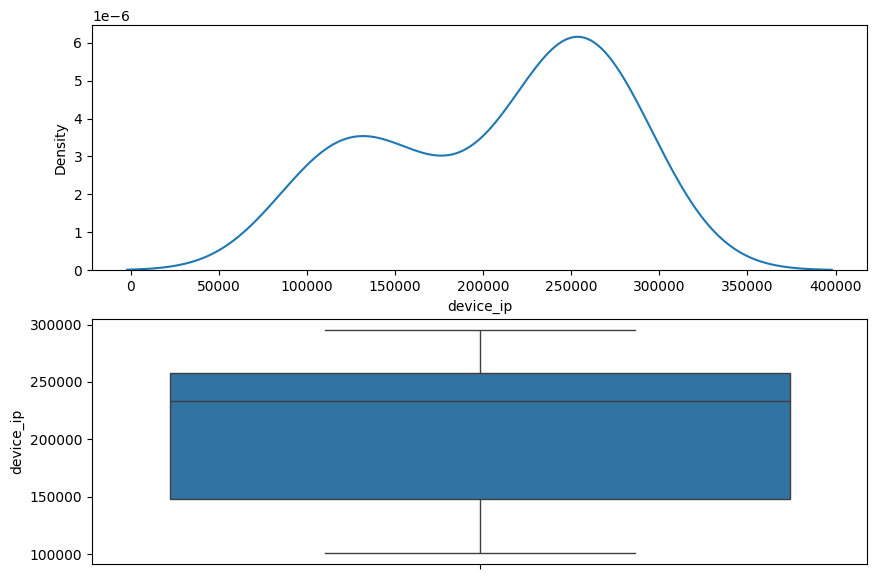

In [61]:
f, (ax1, ax2) = plt.subplots(2, figsize=(10, 7))
sns.kdeplot(data_group['device_ip'], ax=ax1)
sns.boxplot(y='device_ip', data=data_group, ax=ax2)
plt.show()


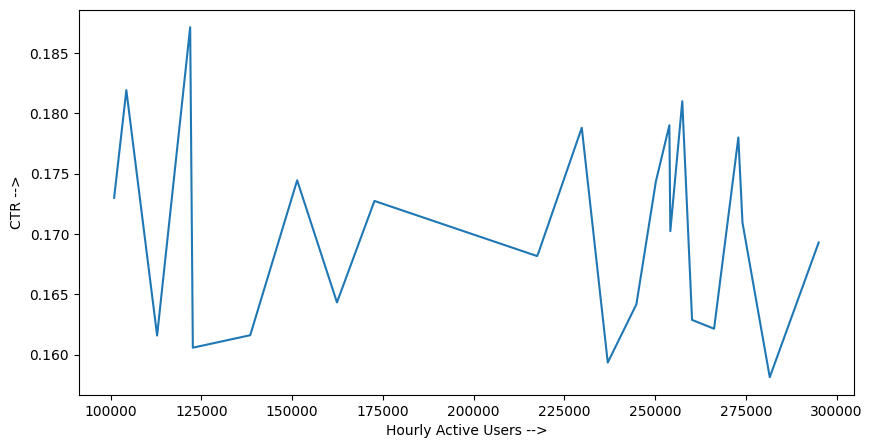

In [62]:
df_new = data.groupby(['hourly_user_count', 'click']).size().unstack()
df_new['CTR'] = df_new[1] / df_new.sum(axis=1)

plt.figure(figsize=(10, 5))
plt.plot(df_new['CTR'])
plt.xlabel('Hourly Active Users -->')
plt.ylabel('CTR -->')
plt.show()


In [ ]:
data_group=data[['hour_of_day','id']].groupby(['hour_of_day']).count()

In [64]:
data_group

,id
hour_of_day,
0,104303
1,121892
2,151366
3,172663
4,236942
5,244832
6,217457
7,229785
8,260173


In [65]:
from tqdm import tqdm
app_count_feature=[]
for index in tqdm(data['hour_of_day']):
    app_count_feature.append(data_group['id'][index])

100%|██████████| 5000000/5000000 [00:33<00:00, 147336.71it/s]


In [66]:
data['hourly_impression_count']=app_count_feature

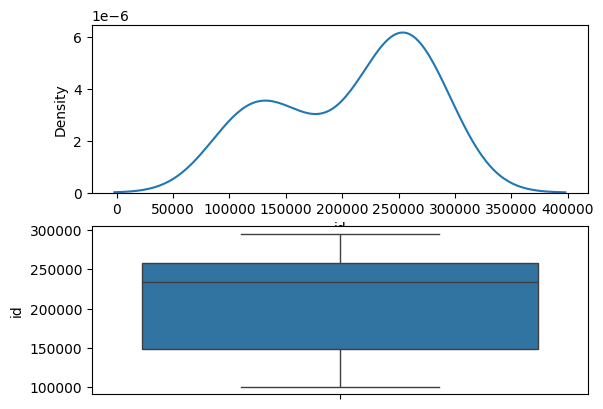

In [67]:
f, (ax1, ax2) = plt.subplots(2)
sns.kdeplot(data_group['id'], ax=ax1)
sns.boxplot(y='id', data=data_group, ax=ax2)
plt.show()


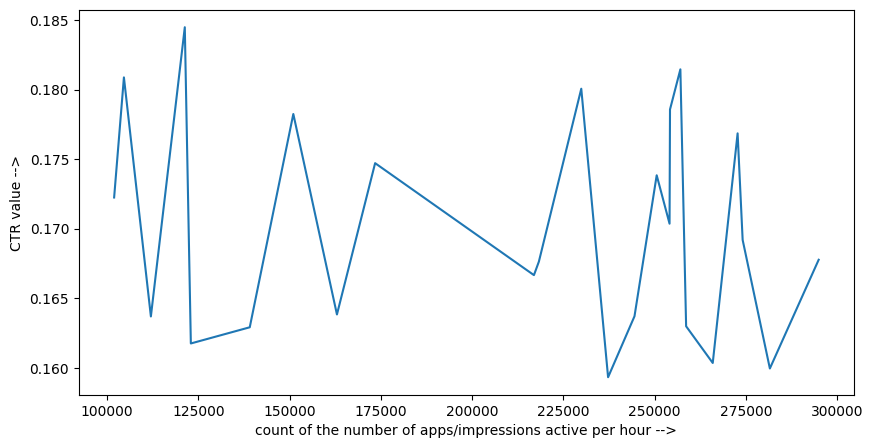

In [ ]:
df_new=data.groupby(['hourly_impression_count','click']).size().unstack()
df_new['CTR']= df_new[1]/(df_new[0]+df_new[1])
plt.figure(figsize=(10,5))
plt.plot(df_new['CTR'])
plt.xlabel('count of the number of apps/impressions active per hour -->')
plt.ylabel('CTR value -->')
plt.show()

In [68]:
data.drop('hourly_impression_count', axis=1, inplace=True)

In [69]:
data.head()

,id,click,hour,C1,banner_pos,site_id,site_domain,site_category,app_id,app_domain,...,C18,C19,C20,C21,device_id_counts,device_ip_counts,hour_numeric,hour_of_day,day_of_week,hourly_user_count
0,10000949271186029916,1,2014-10-21,1005,0,1fbe01fe,f3845767,28905ebd,ecad2386,7801e8d9,...,0,35,-1,79,4124943,1,1413849600000000000,0,Tuesday,104303
1,10002518649031436658,0,2014-10-21,1005,0,85f751fd,c4e18dd6,50e219e0,98fed791,d9b5648e,...,0,551,-1,46,4124943,19,1413849600000000000,0,Tuesday,104303
2,10004670021948955159,0,2014-10-21,1005,0,543a539e,c7ca3108,3e814130,ecad2386,7801e8d9,...,0,39,-1,157,4124943,8,1413849600000000000,0,Tuesday,104303
3,10006192453619779489,0,2014-10-21,1005,0,85f751fd,c4e18dd6,50e219e0,685d1c4c,2347f47a,...,0,35,-1,79,1,8314,1413849600000000000,0,Tuesday,104303
4,10006557235872316145,0,2014-10-21,1005,0,1fbe01fe,f3845767,28905ebd,ecad2386,7801e8d9,...,0,35,-1,79,4124943,4139,1413849600000000000,0,Tuesday,104303


In [ ]:
data.to_csv('train_data.csv', index=False)